In [2]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mesa_reader import MesaData

sb.set(style='white', context='talk', palette='Set1')
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 600
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.direction'] = 'out'

['nmdm_test_wOtherNeu.data', 'nmdm_test_noNMDM.data', 'nmdm_modZ.data']


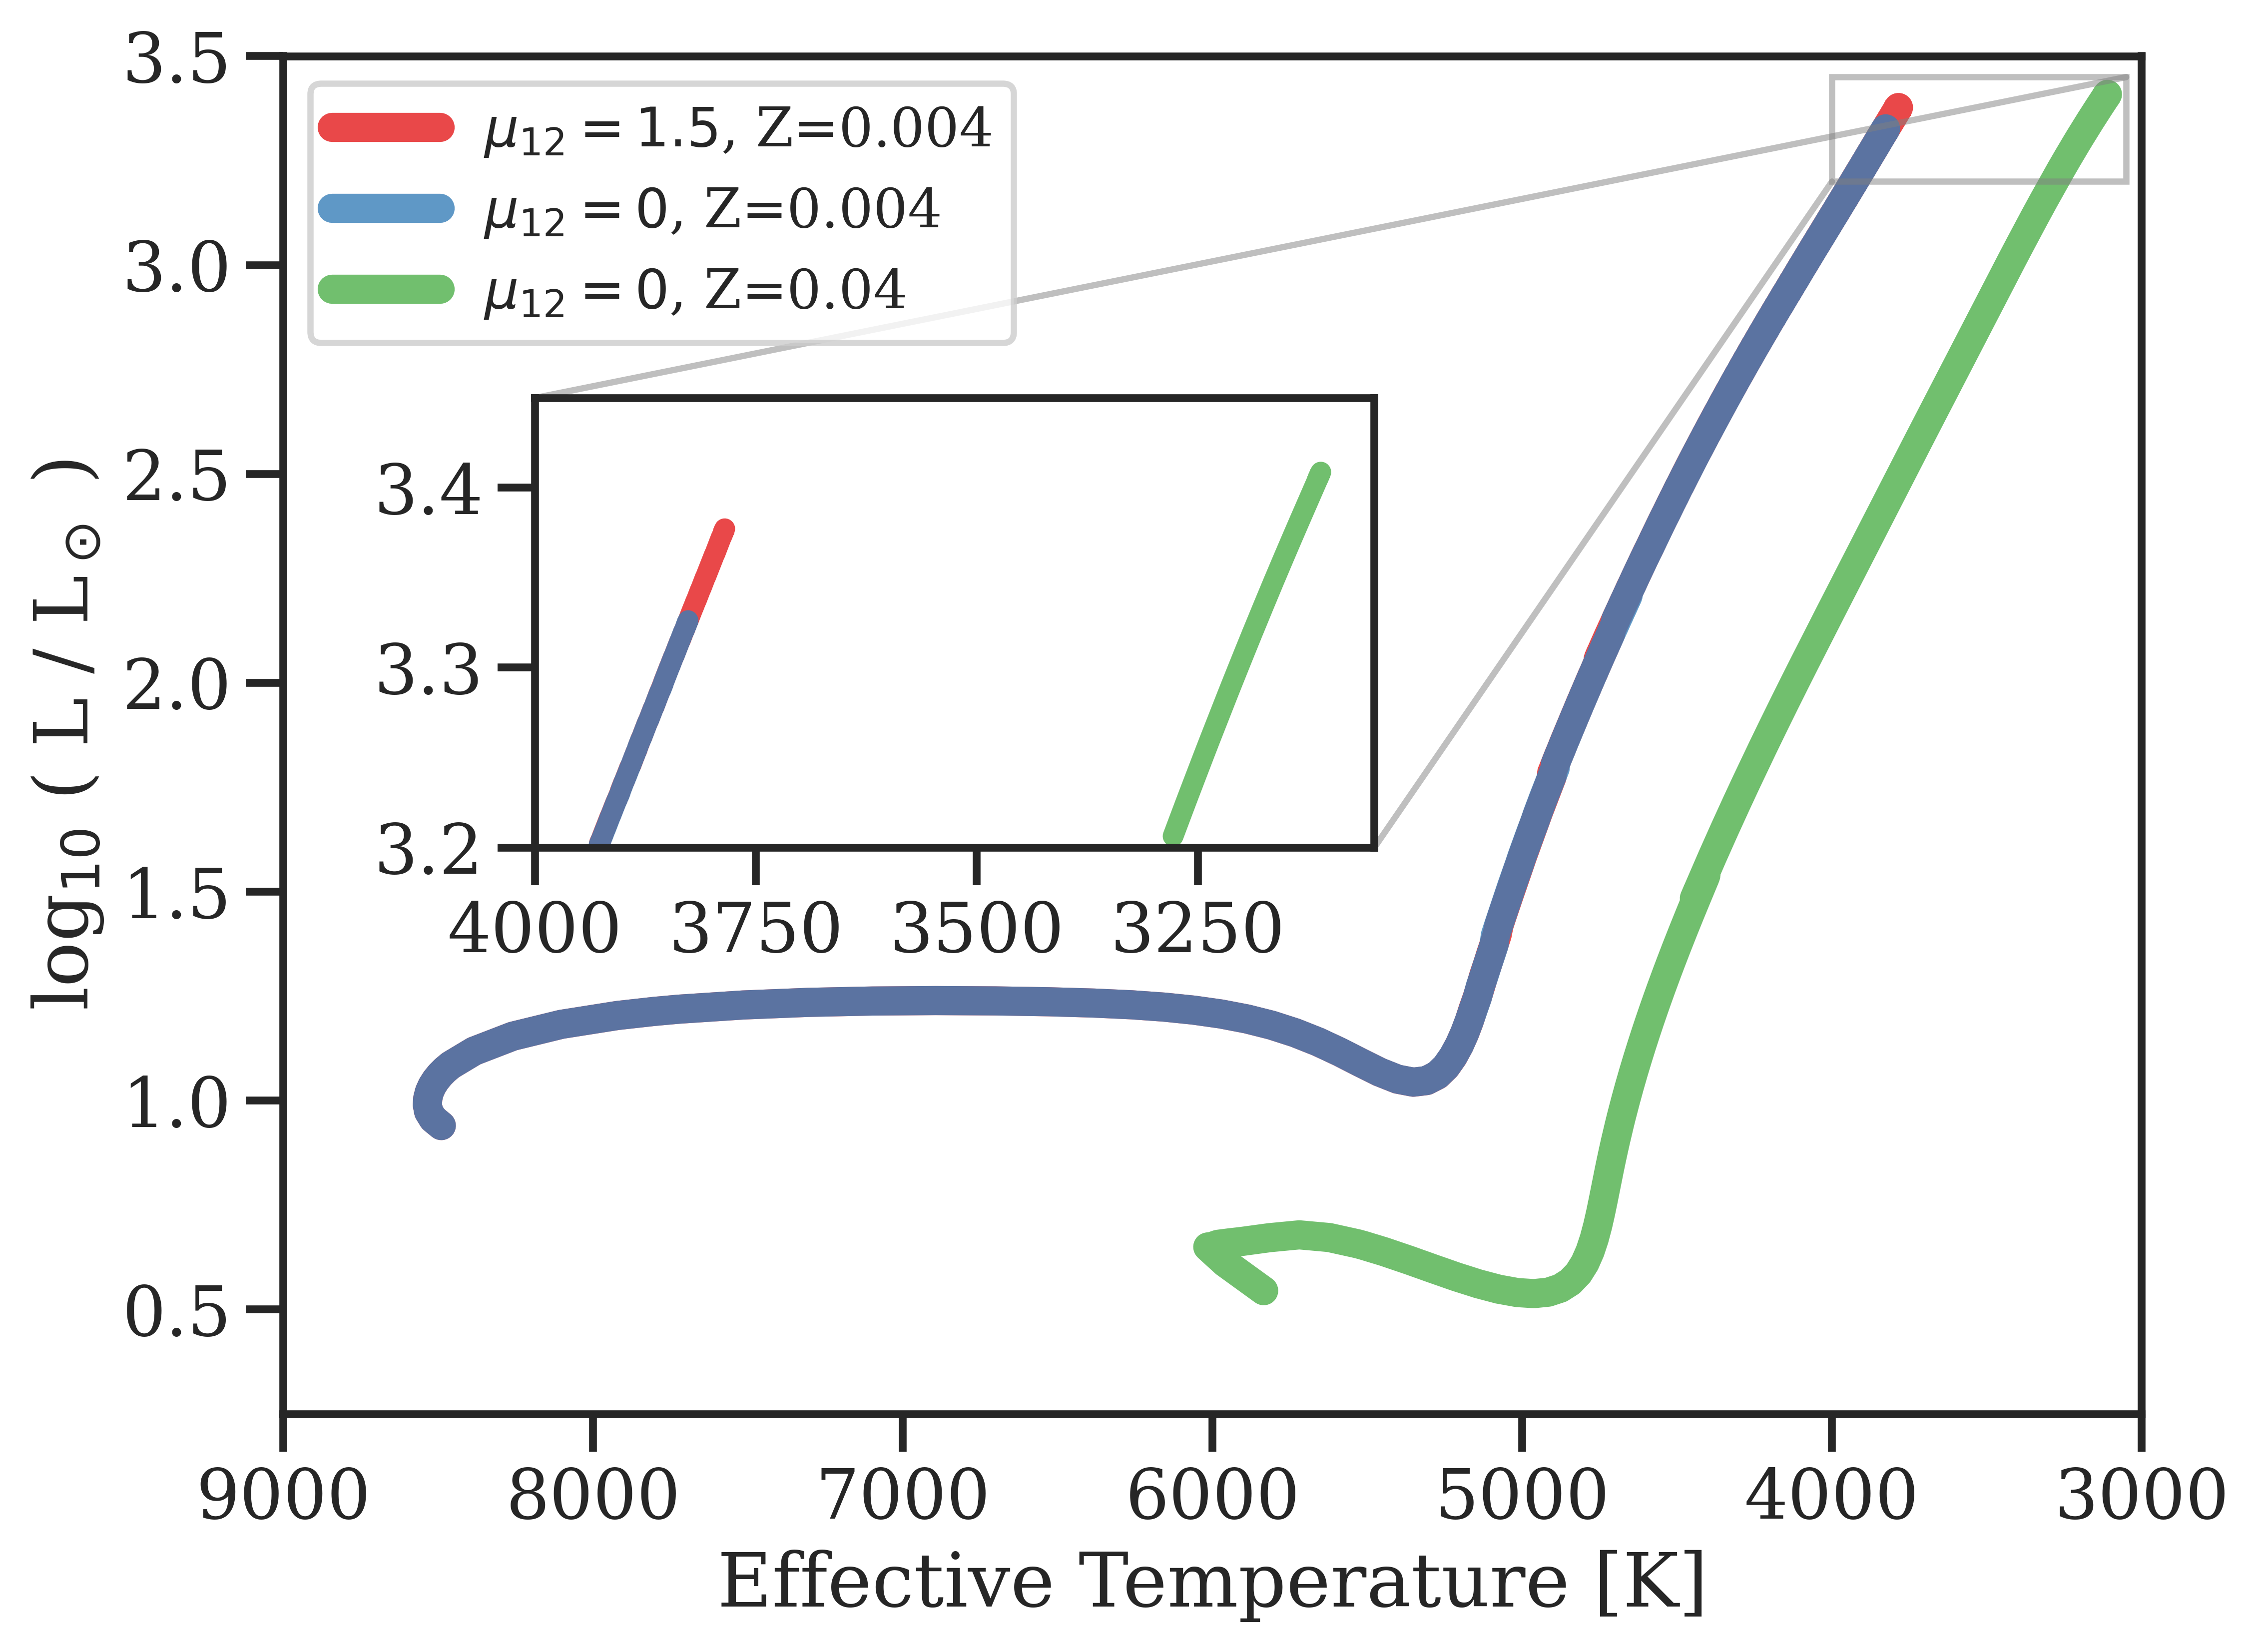

In [3]:
idxs = [98, 98, 95]
end = [298, 200, 375]

#data = glob.glob('*.data')
data = ['nmdm_test_wOtherNeu.data', 'nmdm_test_noNMDM.data', 'nmdm_modZ.data']
#data = ['nmdm_test_wOtherNeu.data', 'nmdm_test_noNMDM.data']

print(data)
fig, ax = plt.subplots(figsize=(8,6))
ax2 = plt.axes([.23, .44, .35, .25])
labels = [r'$\mu_{12}=1.5$, Z=0.004', r'$\mu_{12}=0$, Z=0.004', '$\mu_{12}=0$, Z=0.04']
for d, L, e, idx in zip(data, labels, end, idxs):
    
    m = MesaData(d)
    ax.plot(m.effective_T[idx:], m.log_L[idx:], label=L, alpha=0.8, lw=7)
    
    # Plot just the tip
    ax2.plot(m.effective_T[len(m.effective_T)-e:], 
             m.log_L[len(m.effective_T)-e:],
            alpha=0.8, lw=5)

ax.set_xlabel('Effective Temperature [K]')
ax.set_ylabel(r'log$_{10}$ ( L / L$_\odot$ )')
ax.set_xlim(3000, 9000)
ax.set_ylim(0.25, 3.5)
ax2.set_xlim(3050, 4000)
ax2.set_ylim(3.2, 3.45)
ax.invert_xaxis()
ax2.invert_xaxis()
ax.indicate_inset_zoom(ax2)
ax.legend(loc='upper left', prop={'size': 13}); # loc=(0.05, 0.8)
fig.savefig('zoomIn_compare.jpeg', transparent=False, bbox_inches='tight')

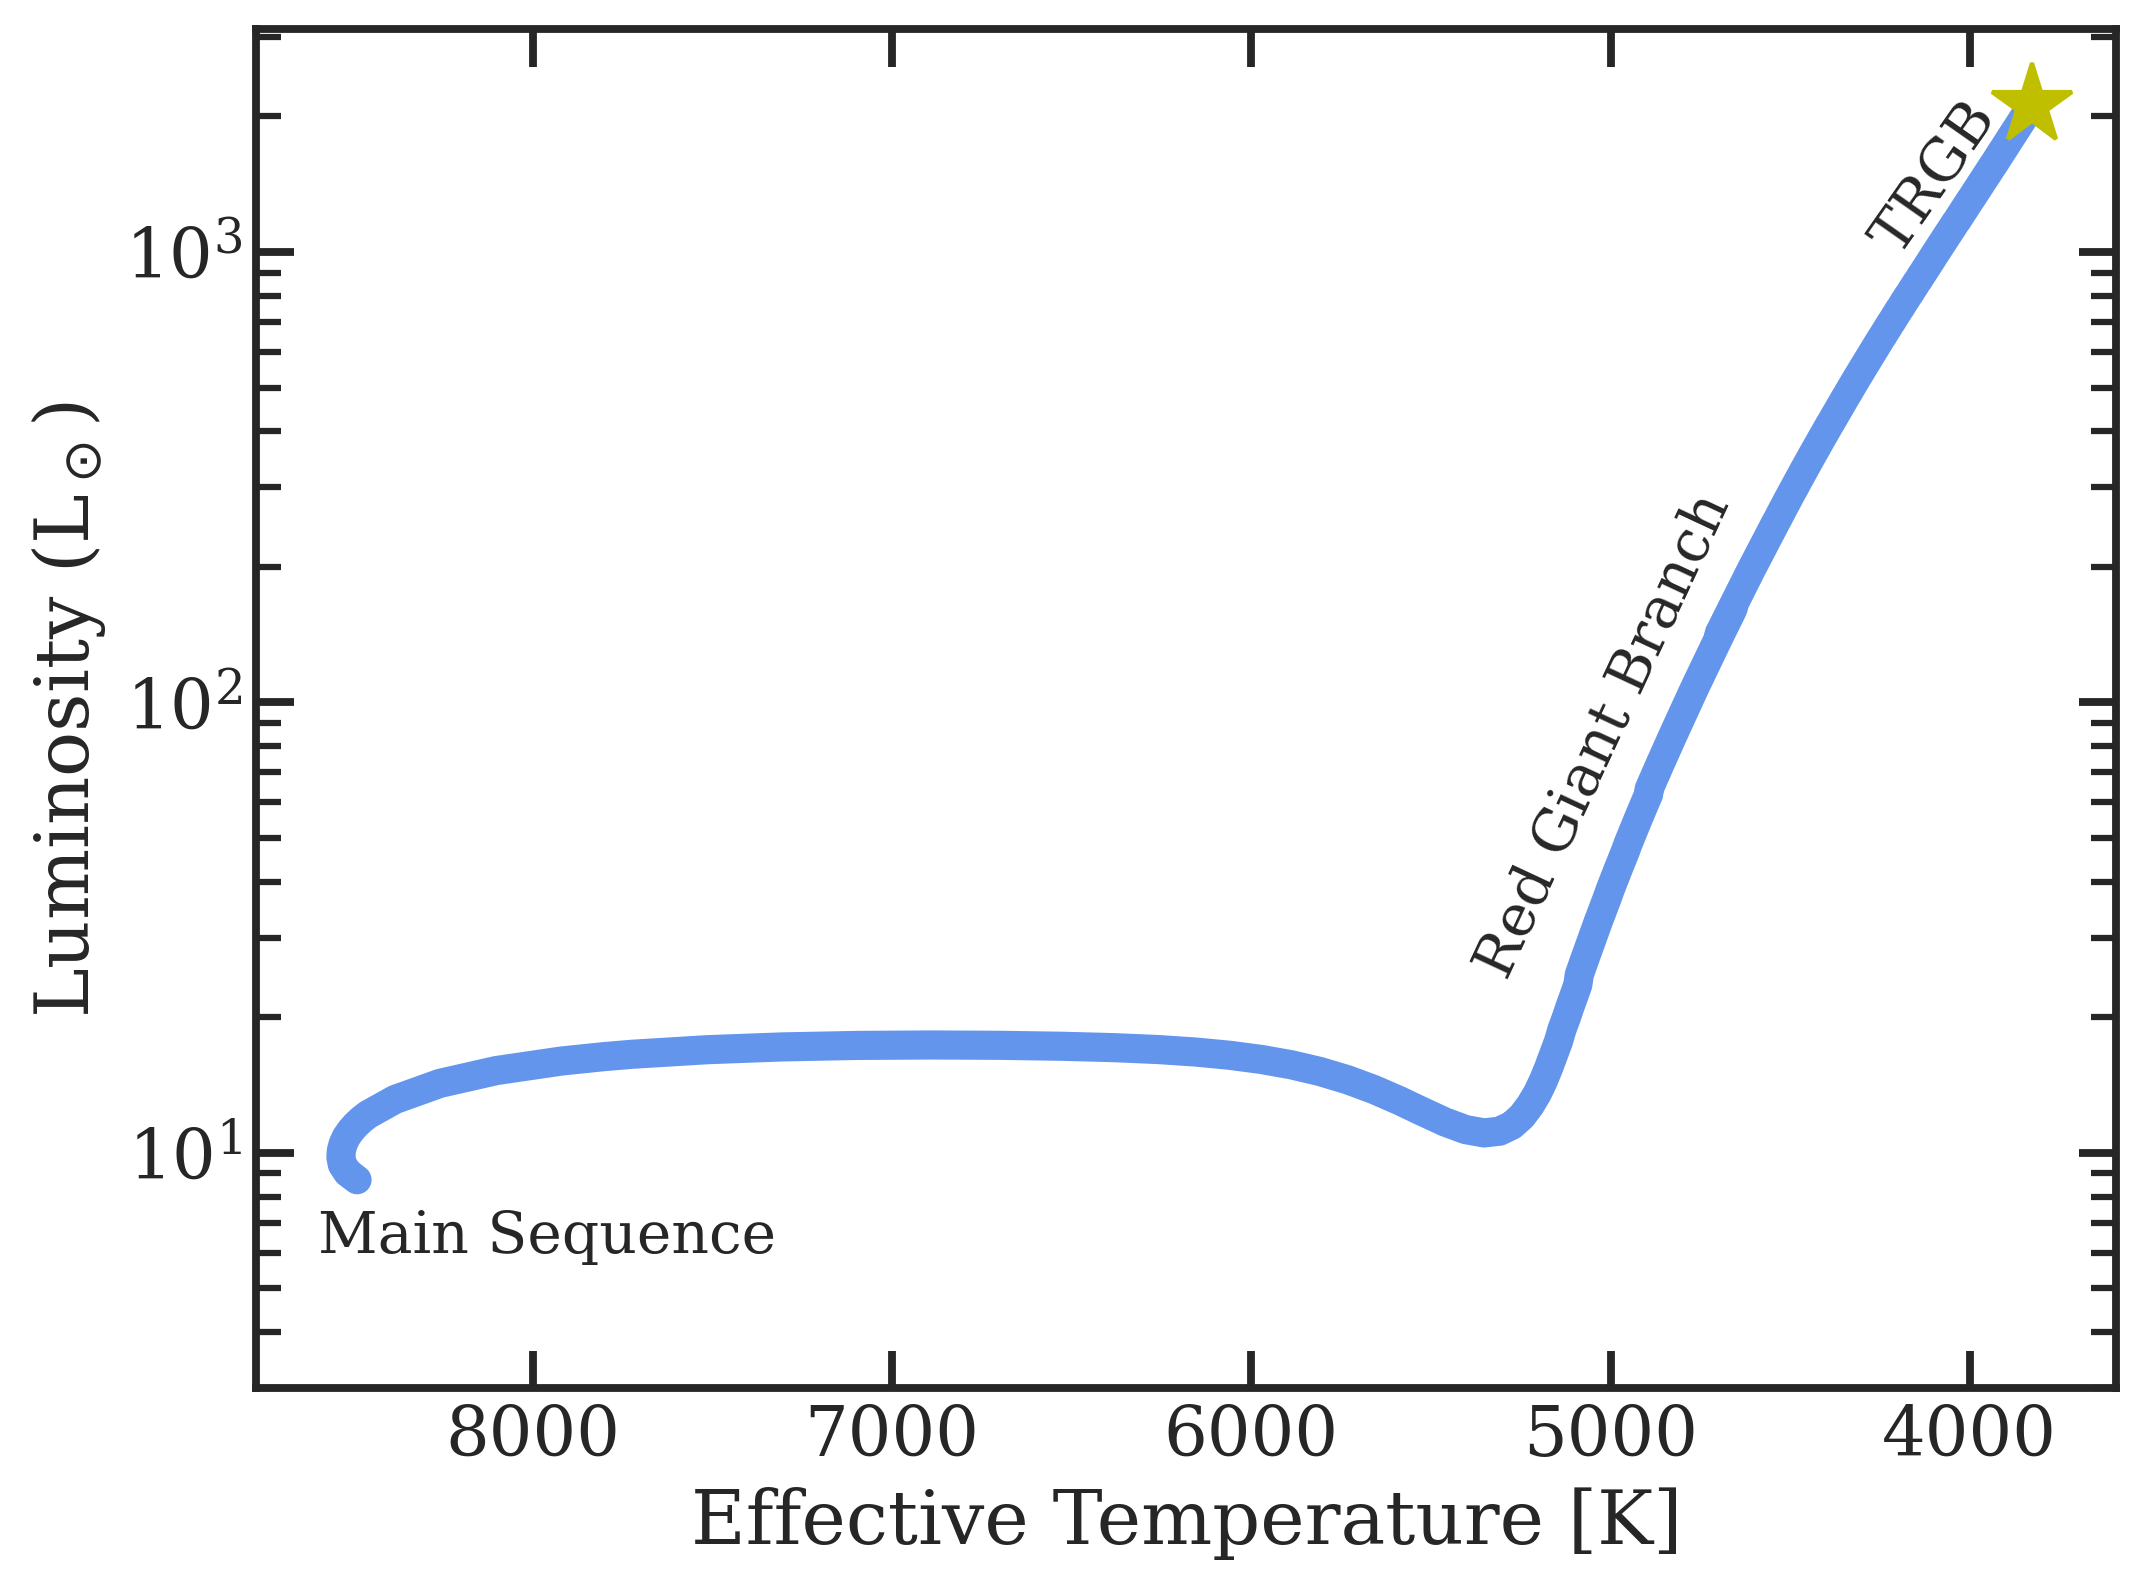

In [4]:
sb.set_style('white')

plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 300
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

fig, ax = plt.subplots(figsize=(8,6))
sm = data[1]
m = MesaData(sm)
ax.plot(m.effective_T[idxs[1]:], 10**m.log_L[idxs[1]:], label=L, alpha=1, lw=7, color='cornflowerblue')
ax.set_xlabel('Effective Temperature [K]')
ax.set_ylabel(r'Luminosity (L$_\odot$)')
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_ylim(3, max(10**m.log_L)+10**3)

ax.text( 8600, 6, 'Main Sequence', fontsize=14)
ax.text( 5400, 25, 'Red Giant Branch', fontsize=14, rotation=65)
ax.text( 4300, 1000, 'TRGB', fontsize=14, rotation=55)

ax.plot([min(m.effective_T[idxs[1]:])], [max(10**m.log_L[idxs[1]:])], '*', markersize=20, color='y')

#ax.text(8500, 2000, r'M = 1.5 M$_{sun}$', fontsize=12)
#ax.text(8500, 1400, r'Z = 0.004', fontsize=12)
#ax.text(8500, 1000, r'Y = 0.24', fontsize=12)

fig.savefig('evolution_track.jpeg', transparent=False, bbox_inches='tight')